**Introduction to Python for data analysis**\
March 18, 2025\
Basics of matplotlib and seaborn\
Data - https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

In this notebook, we going to explore:
- 3 plots: histogram, boxplot, and scatter plot
- How to plot using matplotlib and seaborn

**Import packages**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Read dataset**

In [2]:
pth = "/content/diabetes.csv"
dat = pd.read_csv(pth)

dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Plot histogram**

1) Simple histogram

- Matplotlib

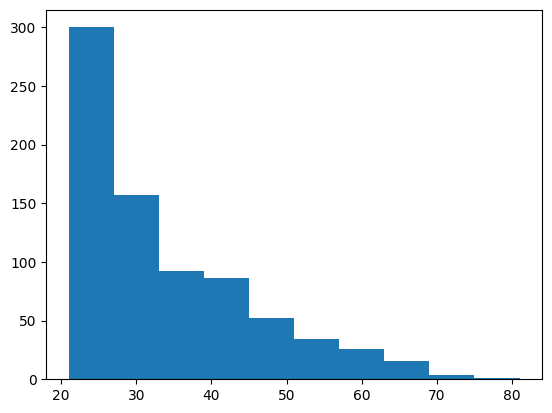

In [5]:
plt.hist(dat['Age'])
plt.show()

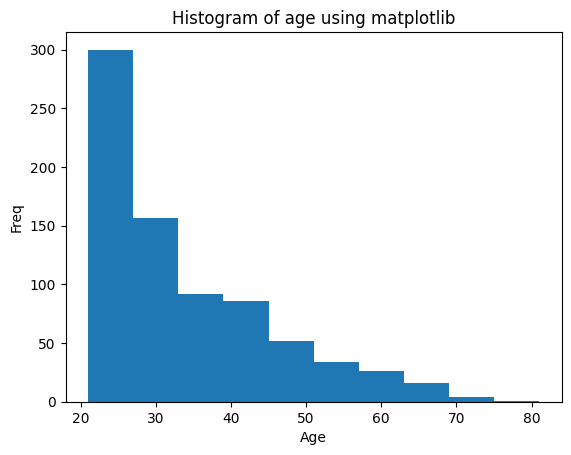

In [6]:
# Histogram with labels
plt.figure()
plt.hist(dat['Age'])
plt.ylabel('Freq')
plt.xlabel('Age')
plt.title('Histogram of age using matplotlib')
plt.show()

- Seaborn

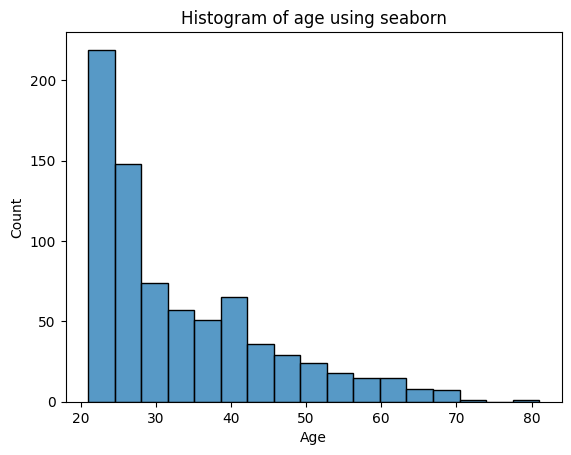

In [7]:
sns.histplot(dat['Age'])
plt.title('Histogram of age using seaborn')
plt.show()

2) Histogram according to different levels/another variable

In [8]:
# Create categorical variable
bins = [20, 35, 50, 65, 100]
labels = ['Young Adult', 'Middle Aged', 'Senior', 'Elderly']
dat['AgeGroup'] = pd.cut(dat['Age'], bins=bins, labels=labels)

In [9]:
# Check our categorical variable
dat['AgeGroup'].value_counts()

,count
AgeGroup,
Young Adult,498
Middle Aged,189
Senior,68
Elderly,13


- Matplotlib

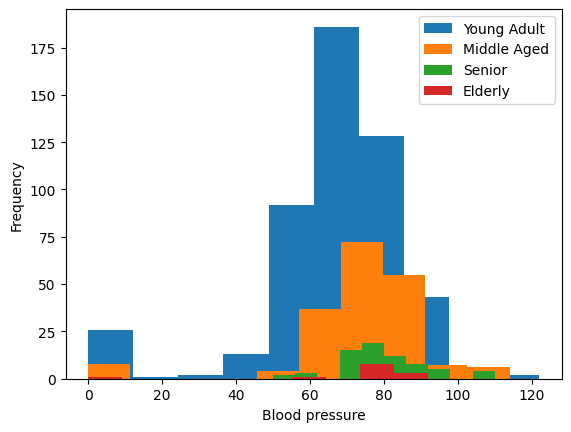

In [10]:
# Label
AgeGroup = labels

# Histogram
for i in AgeGroup:
    subset = dat[dat['AgeGroup'] == i]
    plt.hist(subset['BloodPressure'], label = i)

plt.legend(loc='upper right')
plt.xlabel('Blood pressure')
plt.ylabel('Frequency')
plt.show()

- Seaborn

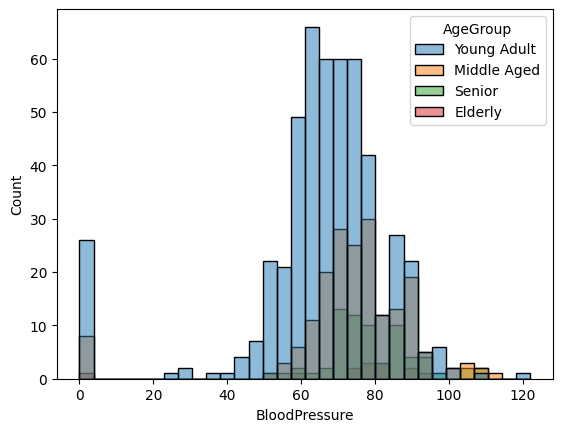

In [11]:
sns.histplot(data=dat, x='BloodPressure', hue='AgeGroup')
plt.show()

**Plot boxplot**

1) Simple boxplot
- Matplotlib

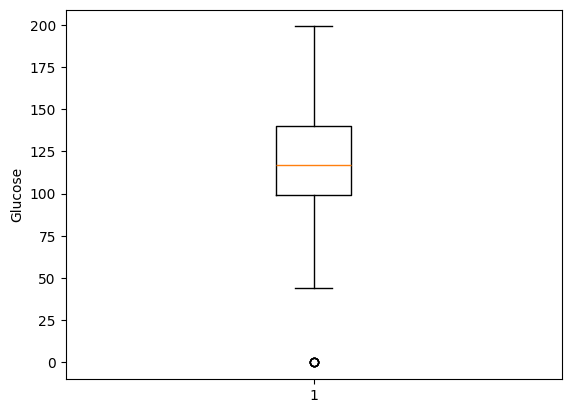

In [14]:
plt.boxplot(dat['Glucose'])
plt.ylabel('Glucose')
plt.show()

- Seaborn

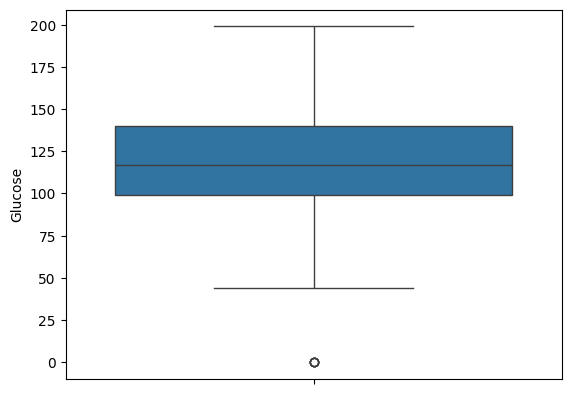

In [15]:
sns.boxplot(dat['Glucose'])
plt.show()

2) Boxplot according to another categorical variable

In [21]:
# Get BloodPressure according to the AgeGroup
age_group = dat.groupby('AgeGroup', observed=False)
young_adult = age_group.get_group('Young Adult')['BloodPressure']
middle_age = age_group.get_group('Middle Aged')['BloodPressure']
senior = age_group.get_group('Senior')['BloodPressure']
elderly = age_group.get_group('Elderly')['BloodPressure']

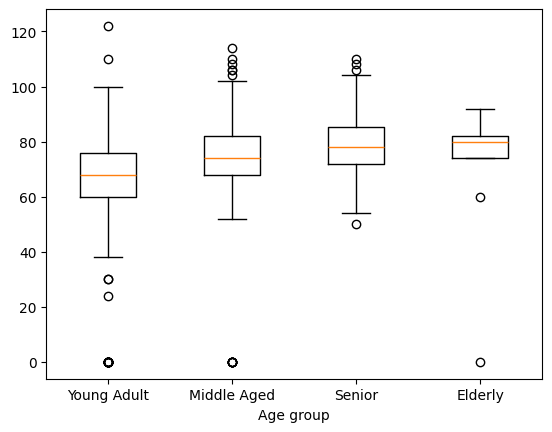

In [20]:
# Plot boxplot
plt.boxplot([young_adult, middle_age, senior, elderly], tick_labels = ['Young Adult', 'Middle Aged', 'Senior', 'Elderly'])
plt.xlabel('Age group')
plt.show()

- Seaborn

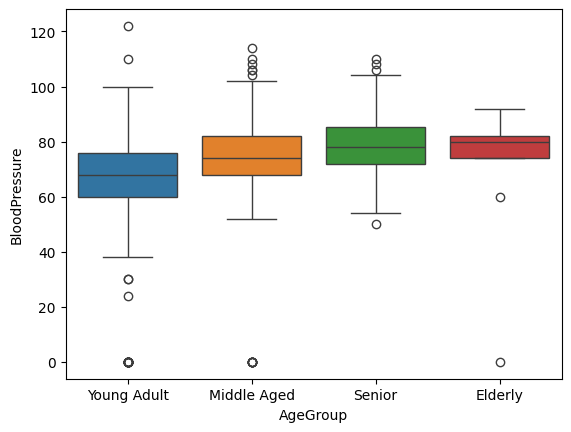

In [23]:
sns.boxplot(data=dat, x='AgeGroup', y='BloodPressure', hue='AgeGroup') #hue is actuallt not needed here, try delete hue and run the codes again
plt.show()

**Plot scatter plot**

1) Simple scatter plot
- Matplotlib

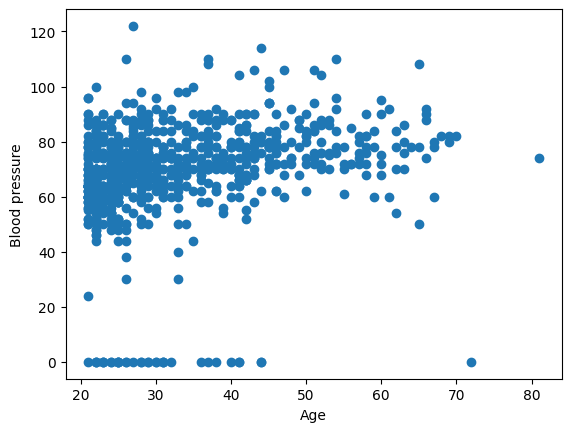

In [24]:
plt.scatter(x=dat['Age'], y=dat['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('Blood pressure')
plt.show()

- Seaborn

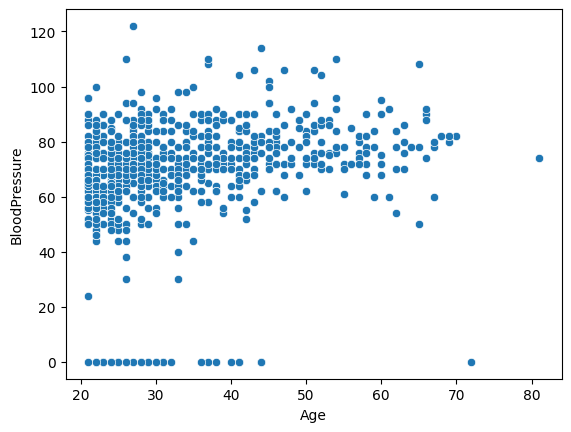

In [25]:
sns.scatterplot(data=dat, x='Age', y='BloodPressure')
plt.show()

2) Scatter plot according to another categorical variable

In [26]:
# Define the age group to colors mapping
age_group_to_color = {'Young Adult': 'blue', 'Middle Aged': 'green', 'Senior': 'red', 'Elderly': 'yellow'}
colors = dat['AgeGroup'].map(age_group_to_color)

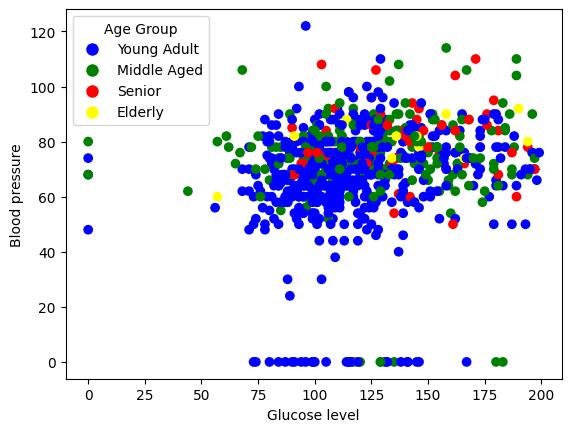

In [27]:
# Create the scatter plot
plt.scatter(x=dat['Glucose'], y=dat['BloodPressure'], c=colors)
plt.xlabel('Glucose level')
plt.ylabel('Blood pressure')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=age)
                  for age, color in age_group_to_color.items()]
plt.legend(handles=legend_handles, title='Age Group')
plt.show()

- Seaborn

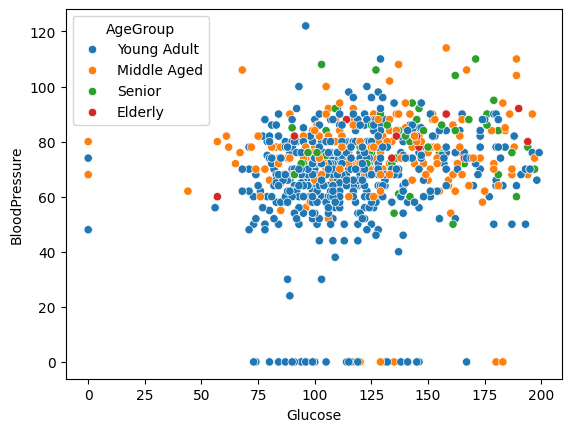

In [28]:
sns.scatterplot(x='Glucose', y='BloodPressure', data=dat, hue='AgeGroup')
plt.show()